In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

Loading Data

In [2]:
file = 'API_SP.POP.TOTL_DS2_en_csv_v2_3309470.csv'
df =pd.read_csv(file, skiprows=4, encoding='ISO-8859-1')
df = df.iloc[:, :-1]

Data preprocessing

In [3]:
display(HTML('<b>Null Value count Before</b>'))
print(df.isnull().sum())

#Drop Duplicates
df = df.drop_duplicates()

# filling rows with any missing values
df = df.fillna(method = "ffill")

# Drop columns with more than 50% missing values
df = df.dropna(axis=1, thresh=df.shape[0]*0.5)

display(HTML('<b>Null Value count After</b>'))
print(df.isnull().sum())

#menting Data
melted_df = pd.melt(df, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],var_name='Year', value_name='Population')


display(HTML('<b>Head of Melted Data</b>'))
melted_df.head()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              2
                 ..
2019              1
2020              1
2021              1
2022              1
2023              1
Length: 68, dtype: int64


C:\Users\amal krishnan\AppData\Local\Temp\ipykernel_20204\2879120677.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method = "ffill")


Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              0
                 ..
2019              0
2020              0
2021              0
2022              0
2023              0
Length: 68, dtype: int64


,Country Name,Country Code,Indicator Name,Indicator Code,Year,Population
0,Aruba,ABW,"Population, total",SP.POP.TOTL,1960,54608.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,1960,130692579.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1960,8622466.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,1960,97256290.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,1960,5357195.0


World population

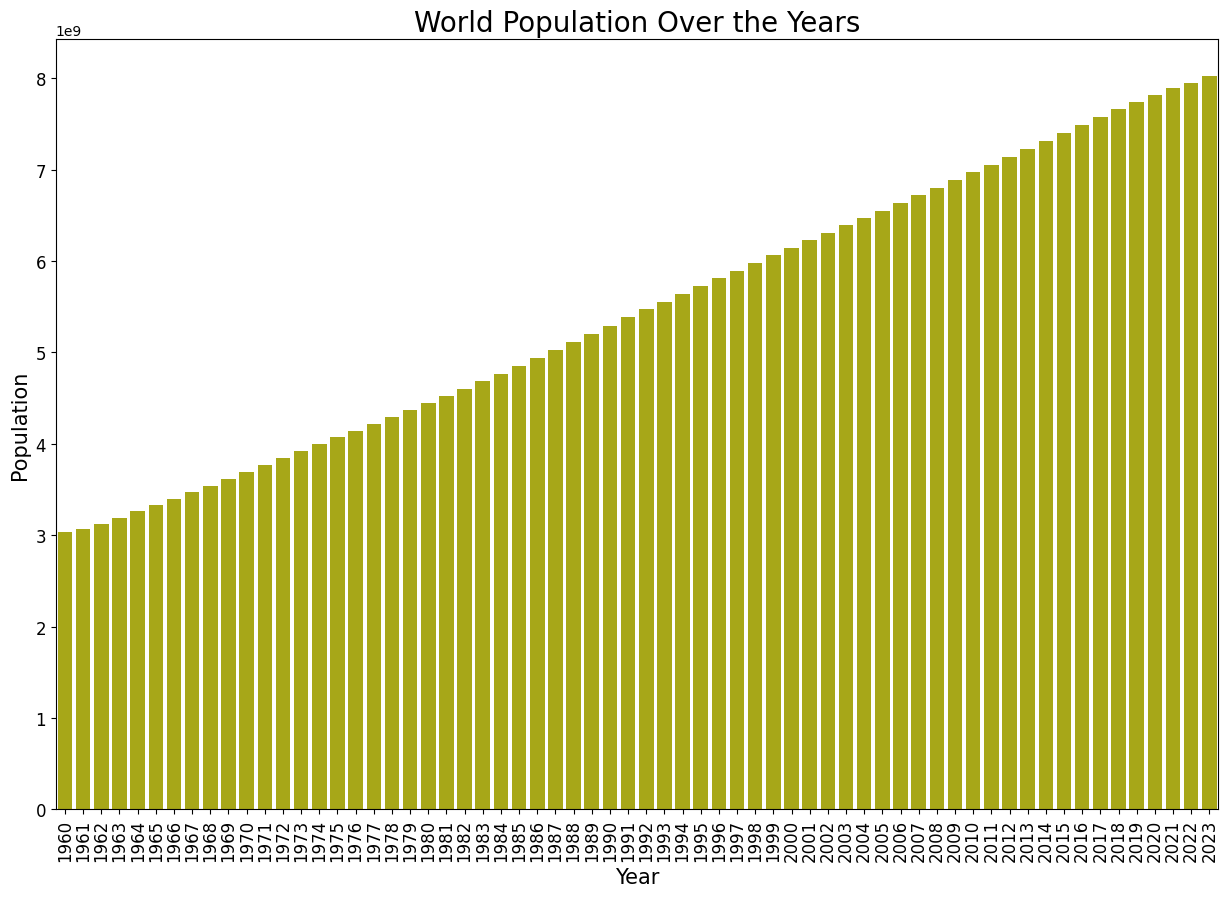

In [4]:
filtered_df = melted_df[melted_df['Country Name'] == 'World']

# Set up the plot
plt.figure(figsize=(15, 10))

# Create a barplot for World Population over the years
sns.barplot(x='Year', y='Population', data=filtered_df, color='y')

# Add a title and labels
plt.title('World Population Over the Years', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Population', fontsize=15)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

Distribution of values on years

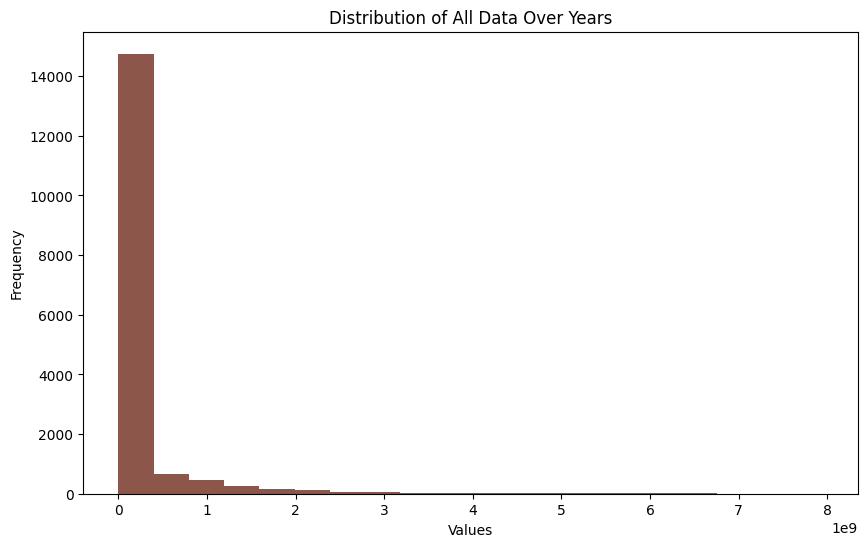

In [5]:
import matplotlib.pyplot as plt
cols = ['1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000','2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022']
# Aggregate all data into a single histogram
all_data = df[cols].values.flatten()  # Flatten DataFrame into a single array
plt.figure(figsize=(10, 6))
plt.hist(all_data, color='#8C564B', bins=20)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of All Data Over Years')
plt.show()

Distribution of values across from 1660-2022

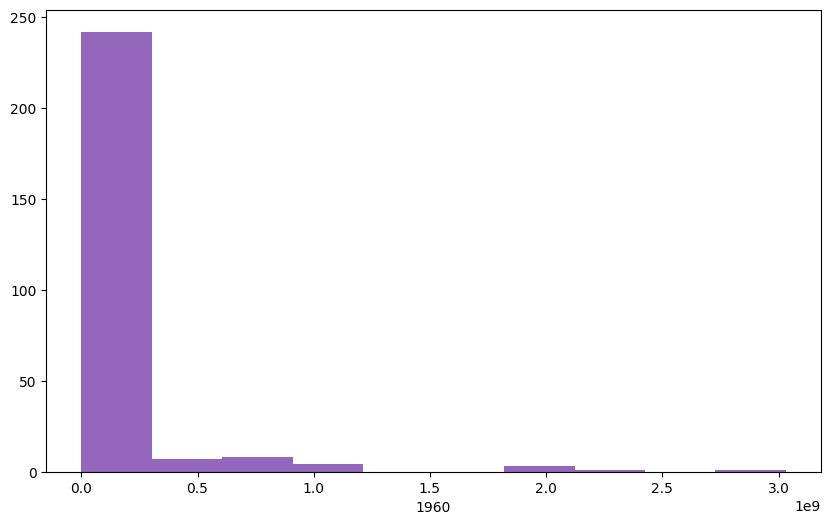

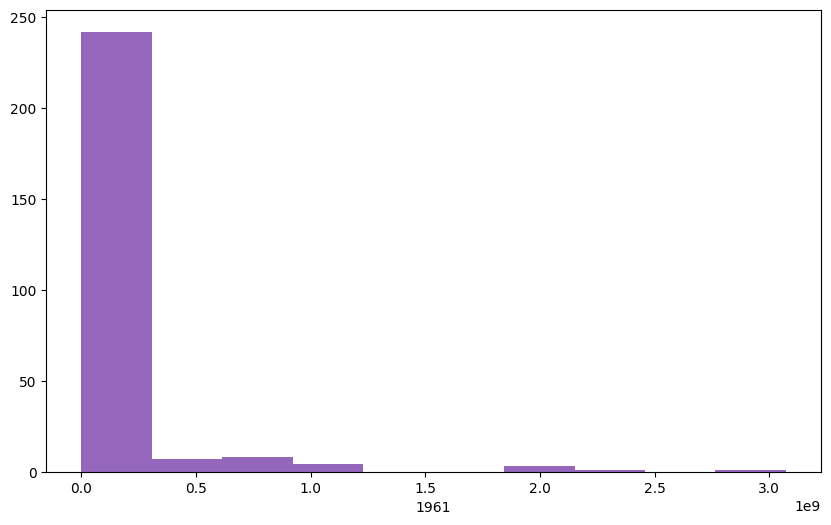

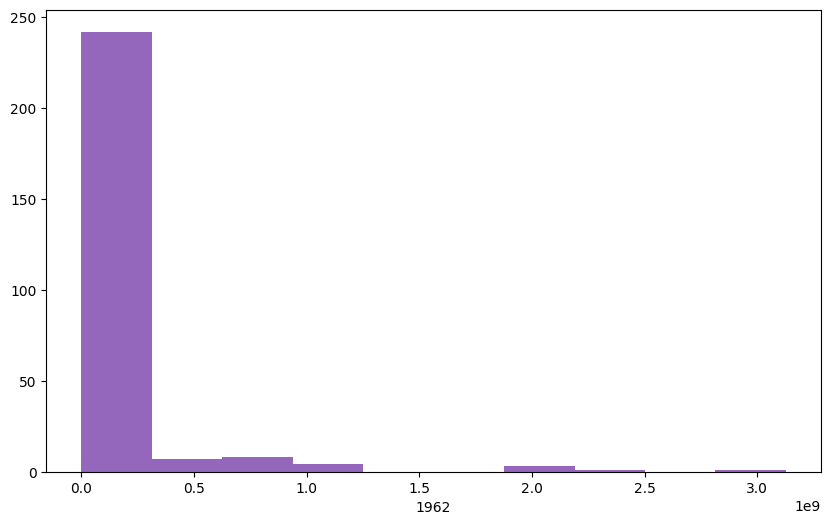

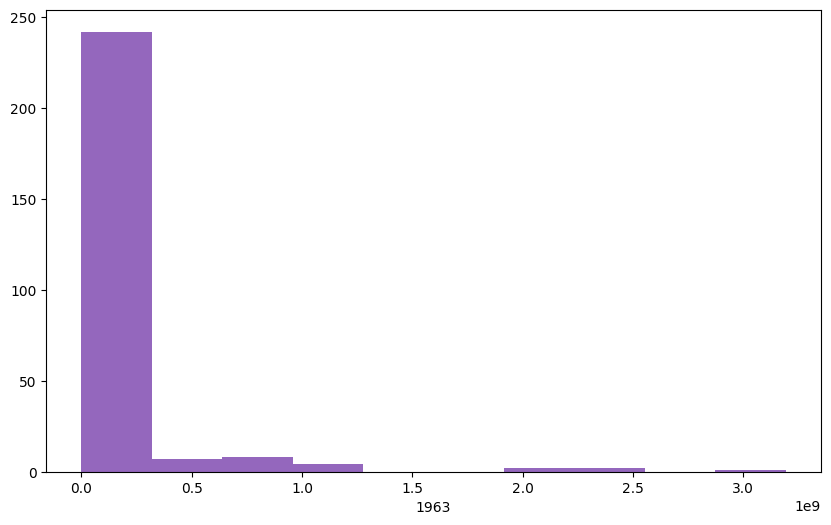

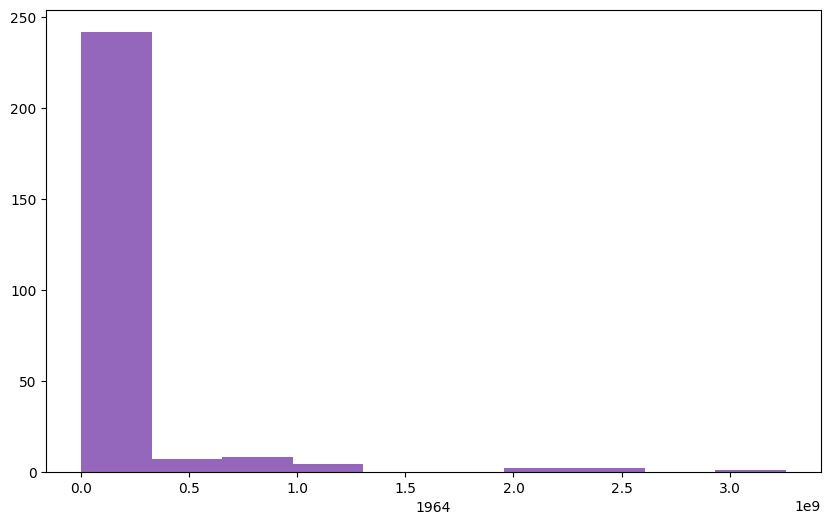

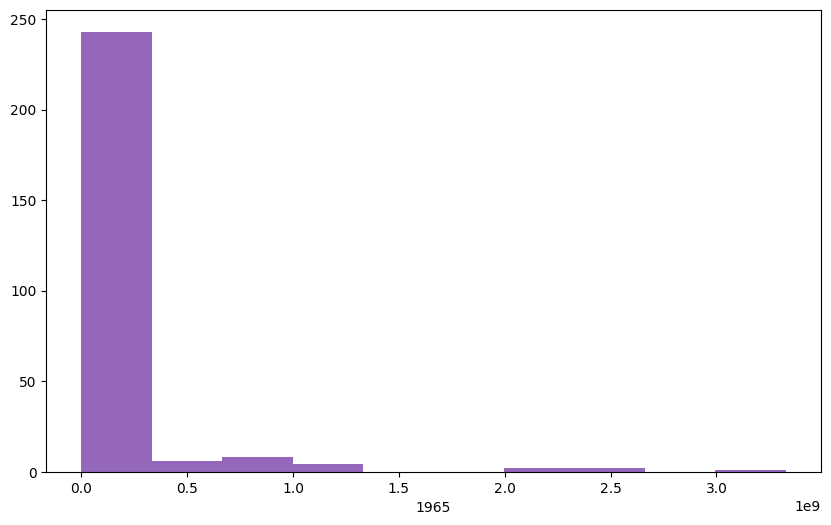

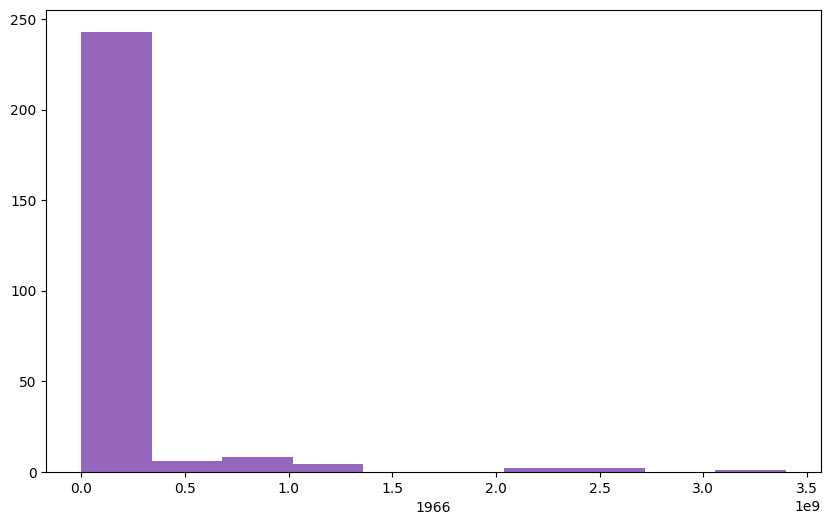

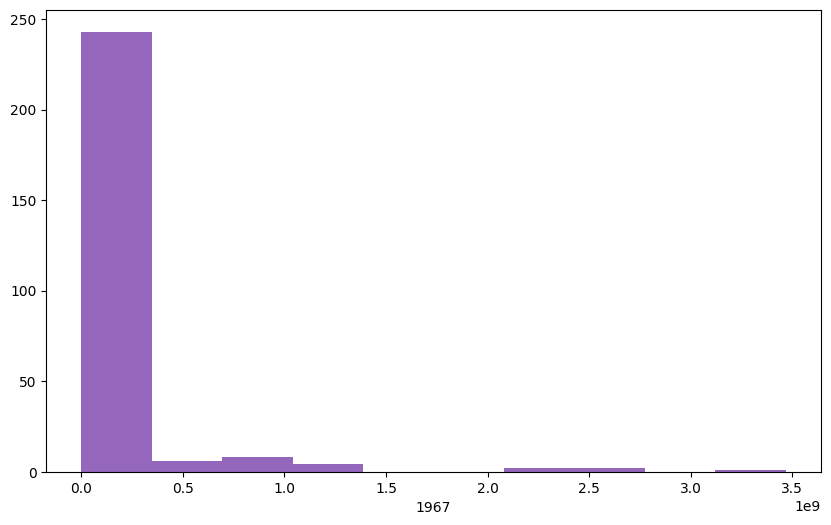

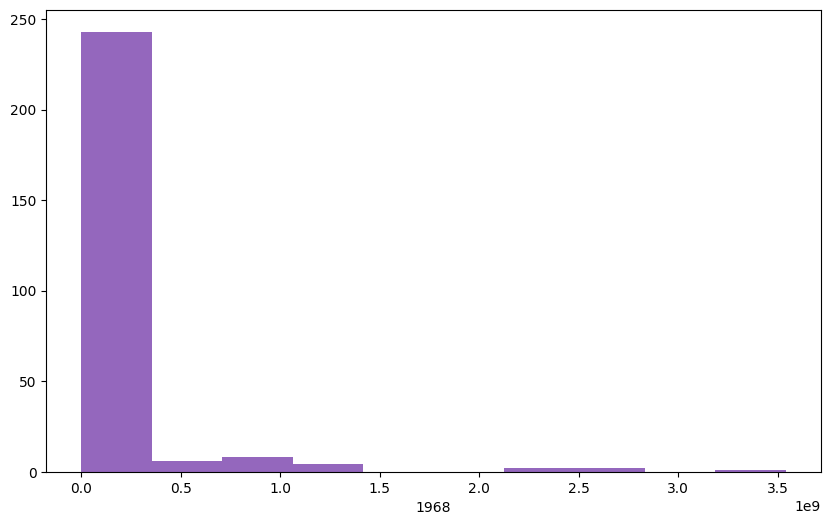

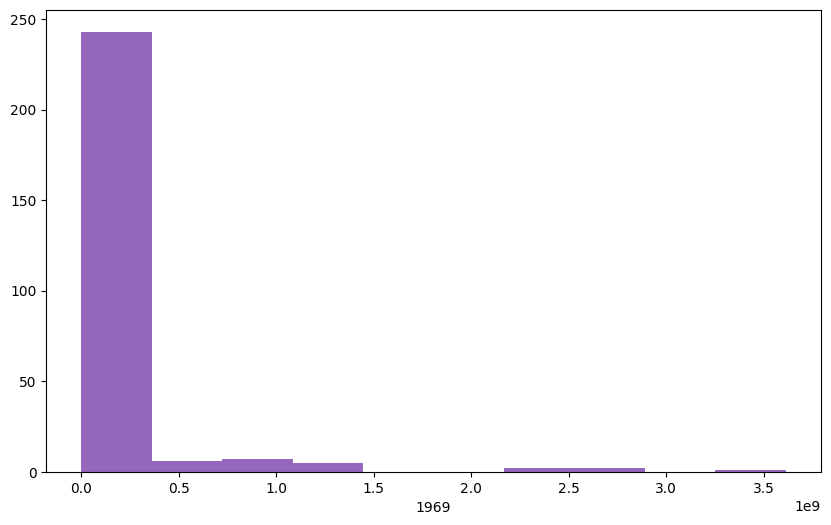

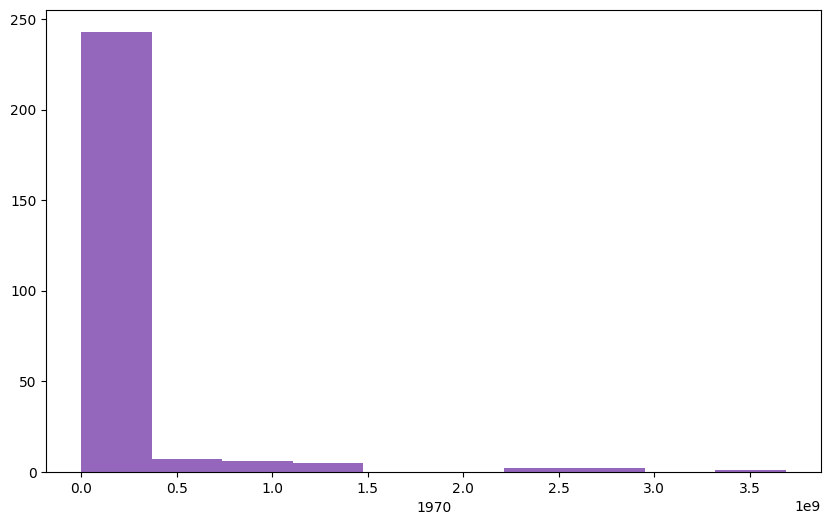

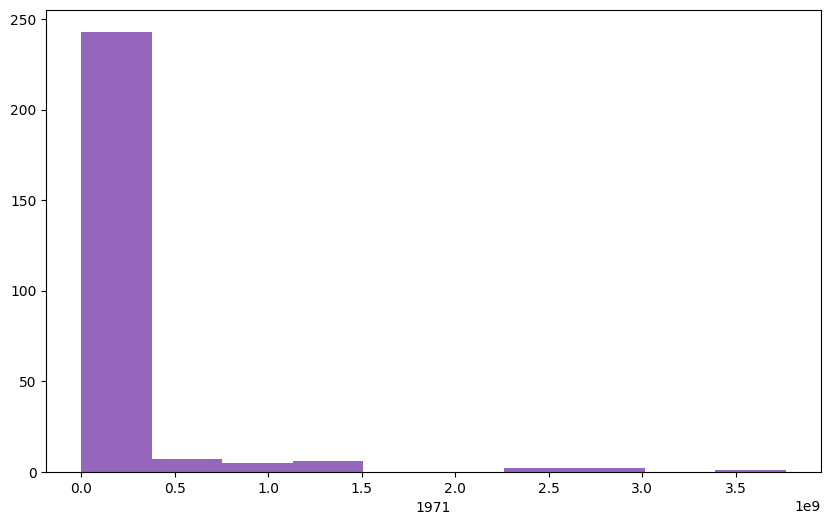

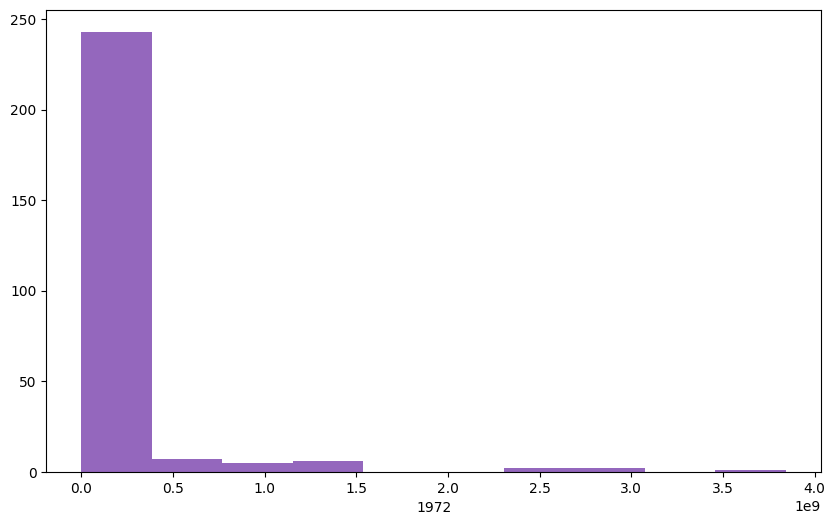

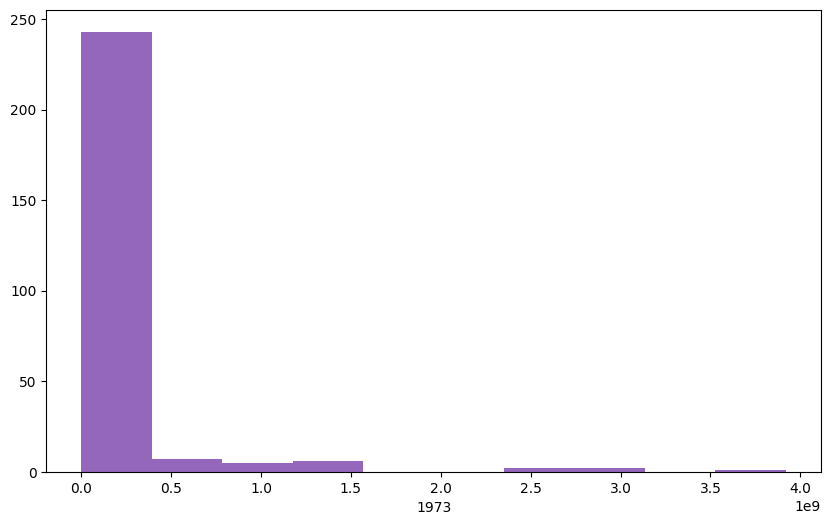

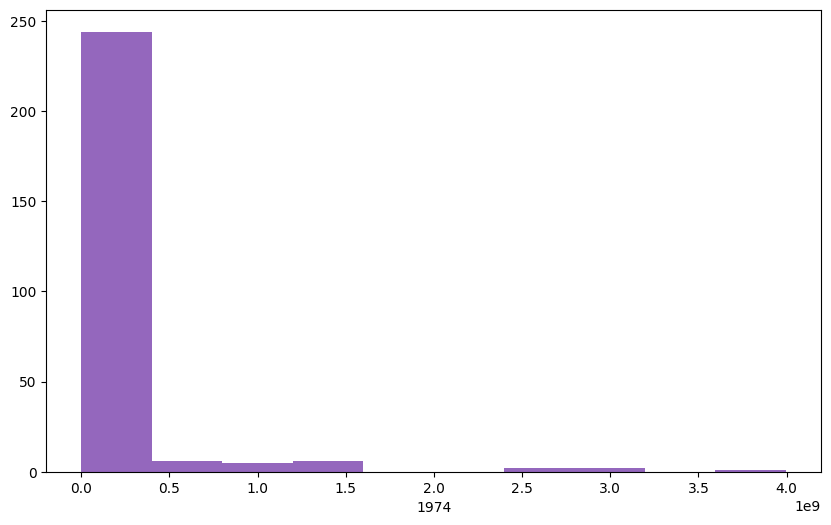

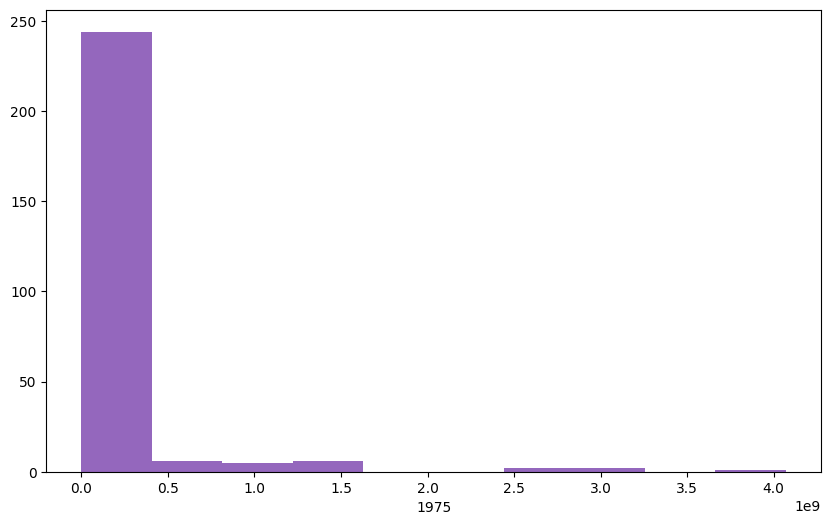

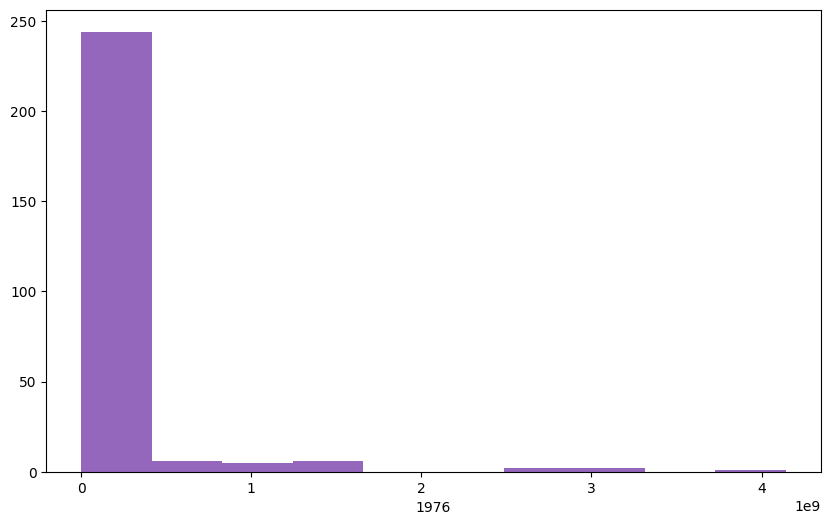

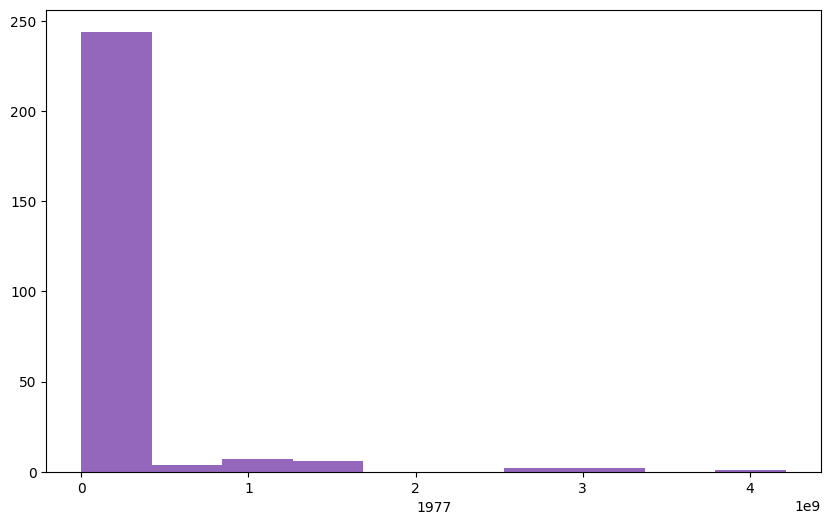

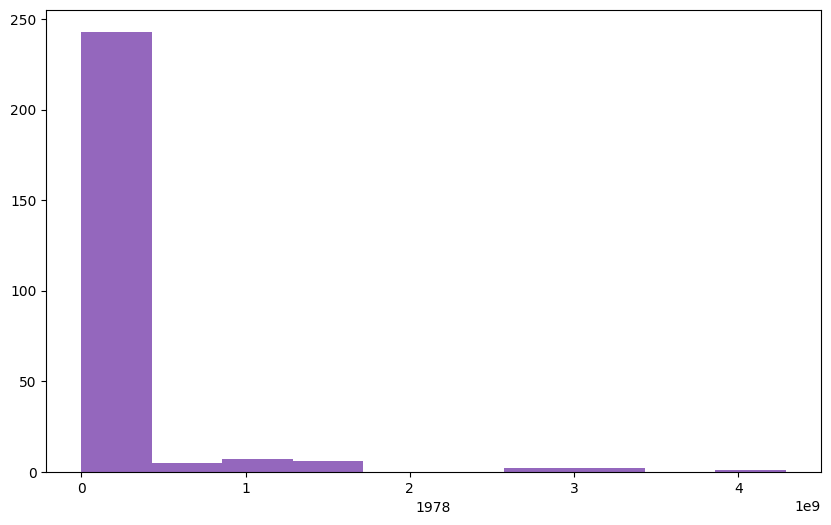

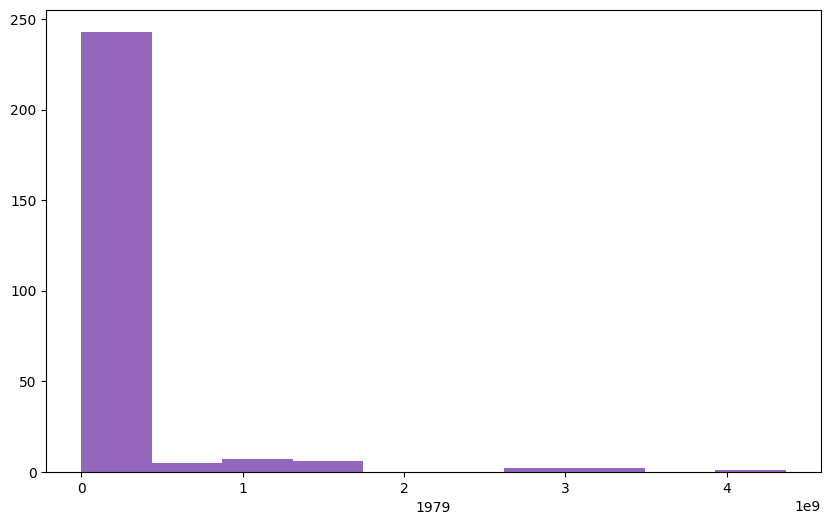

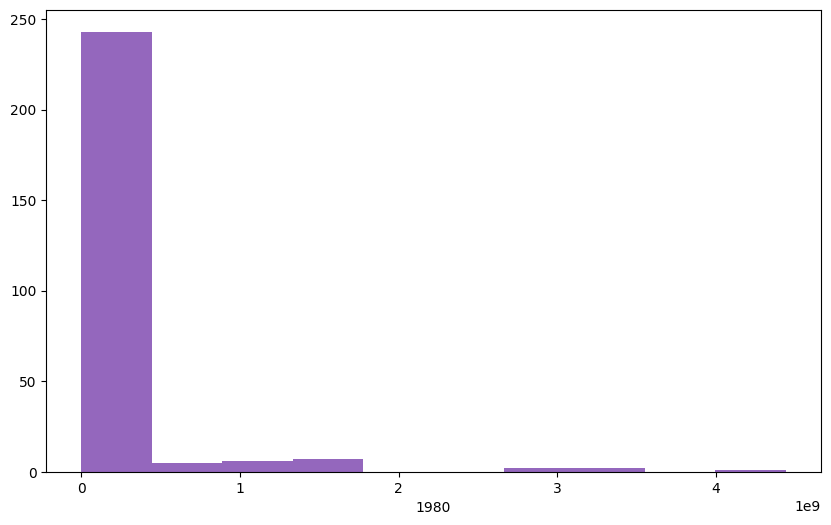

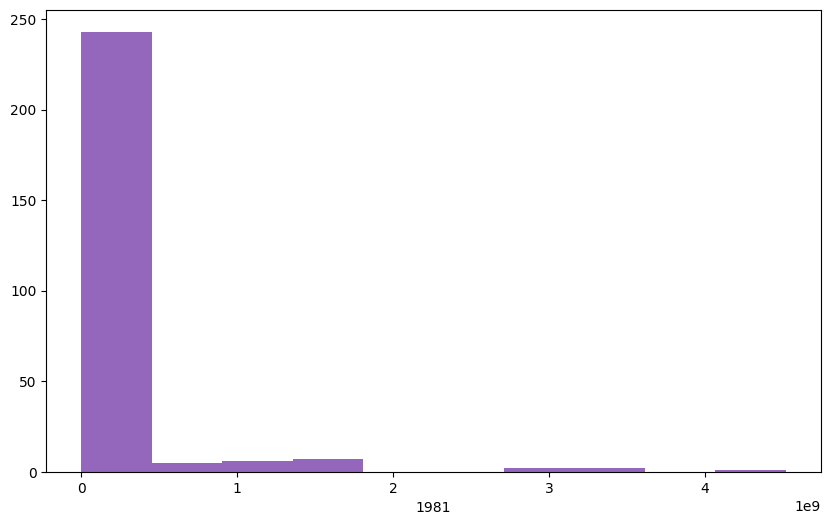

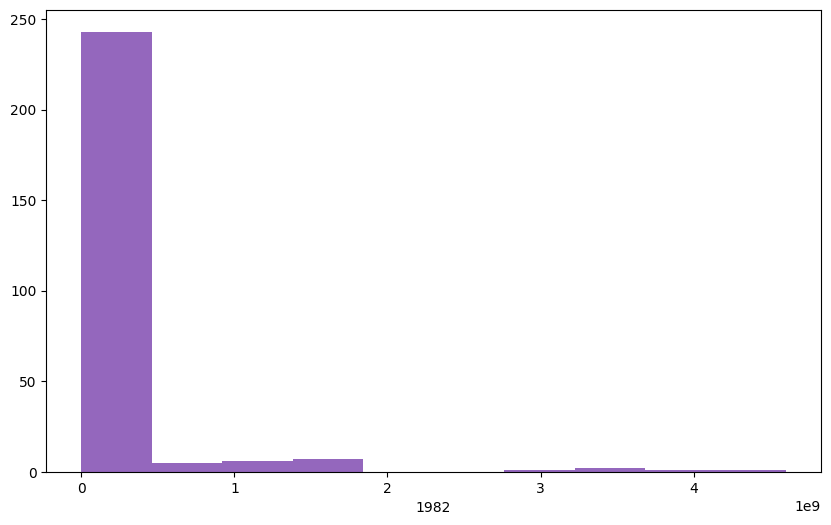

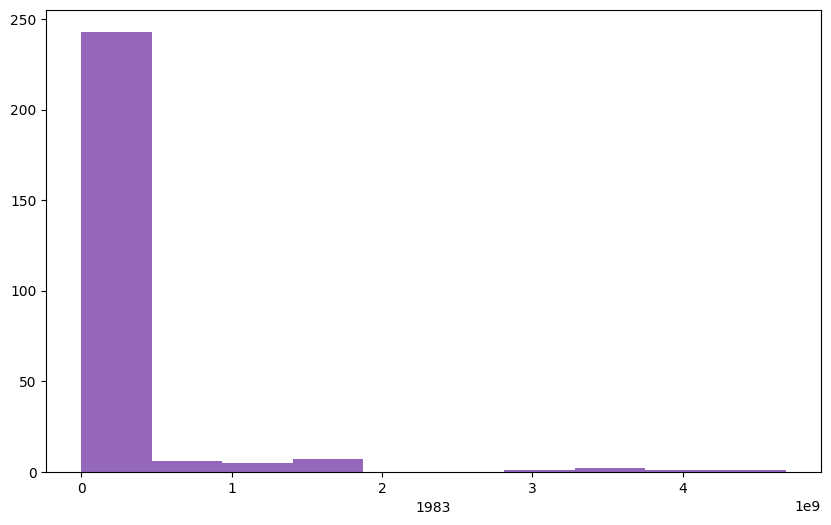

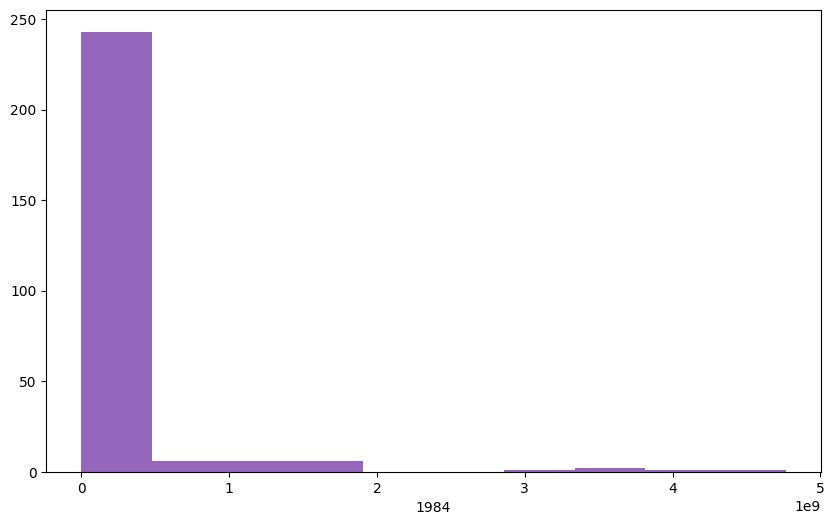

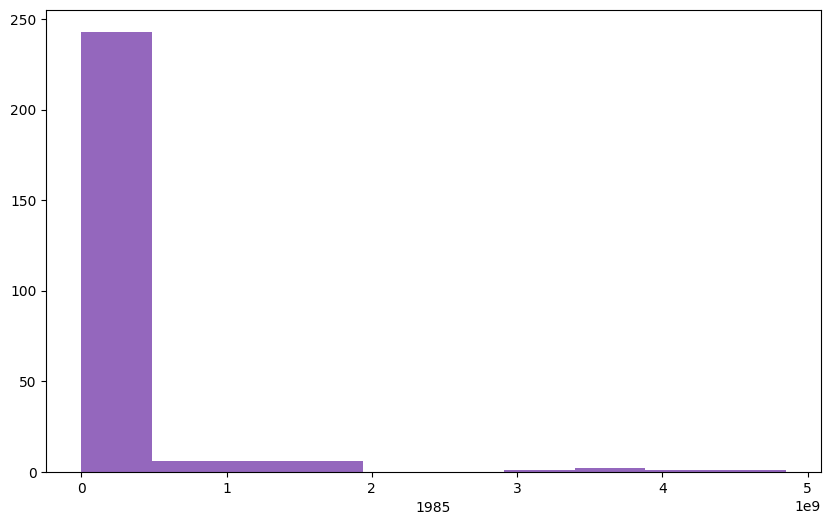

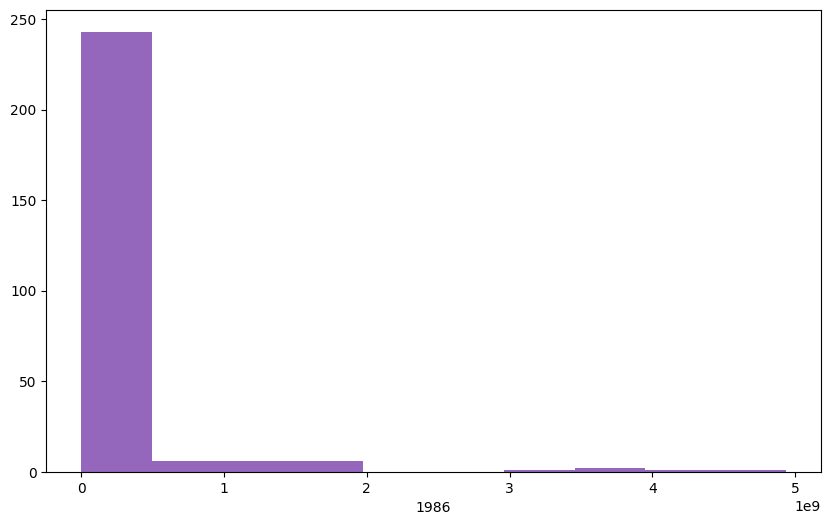

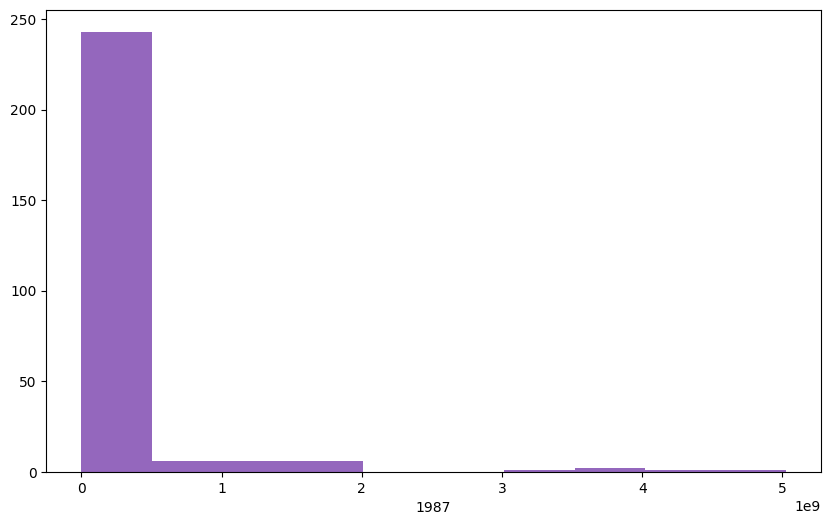

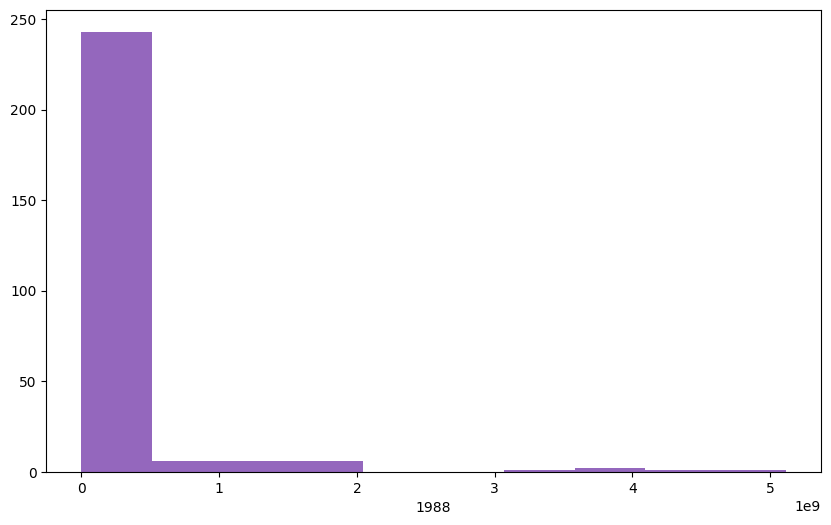

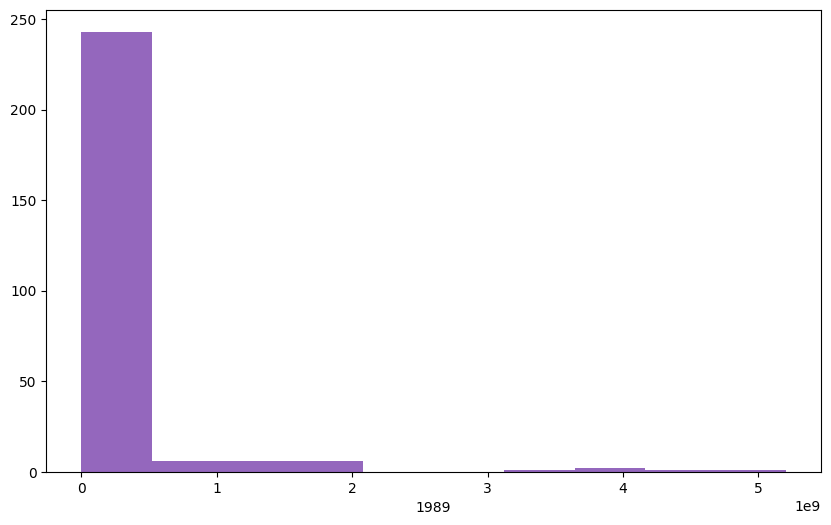

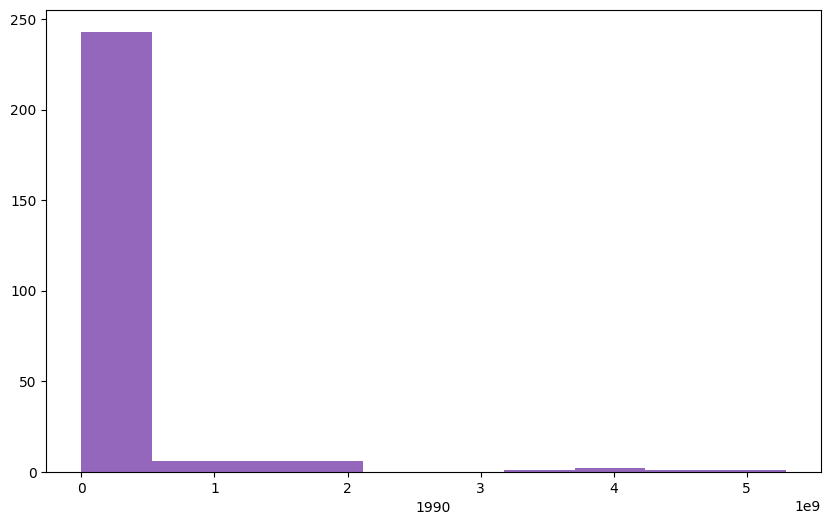

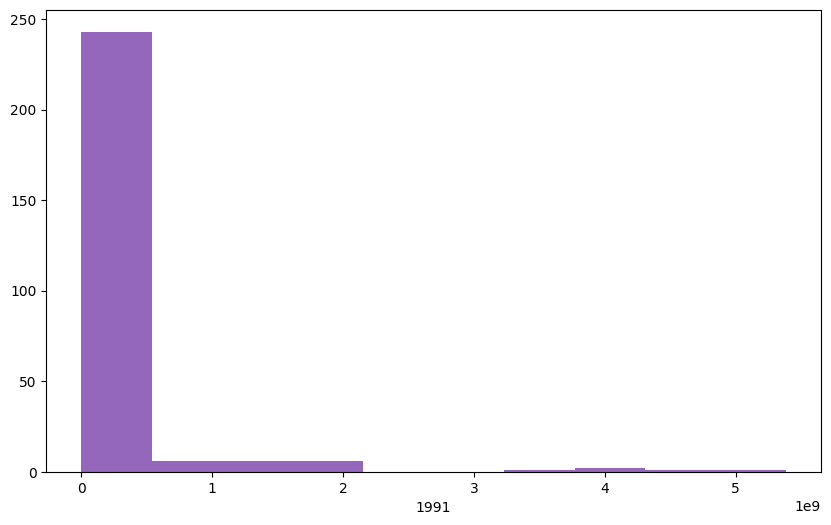

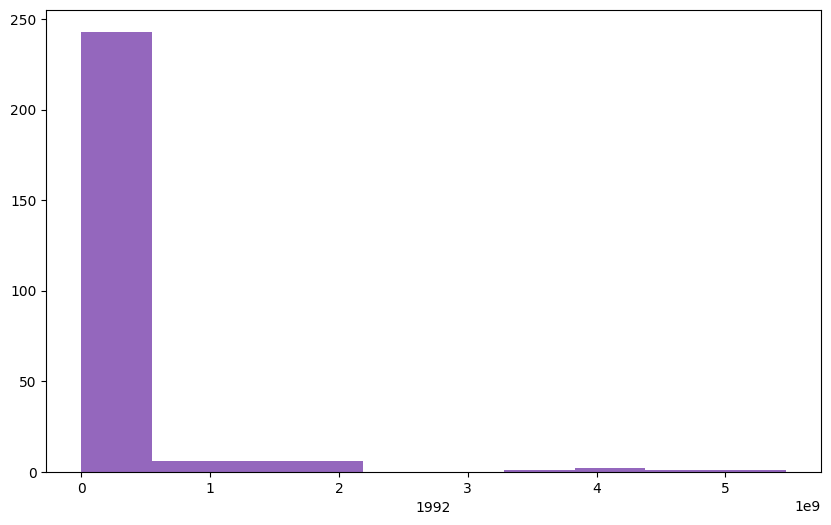

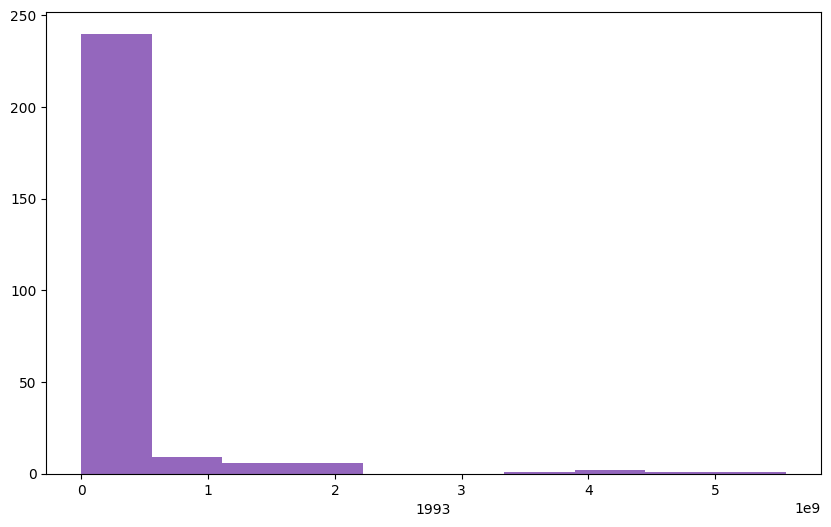

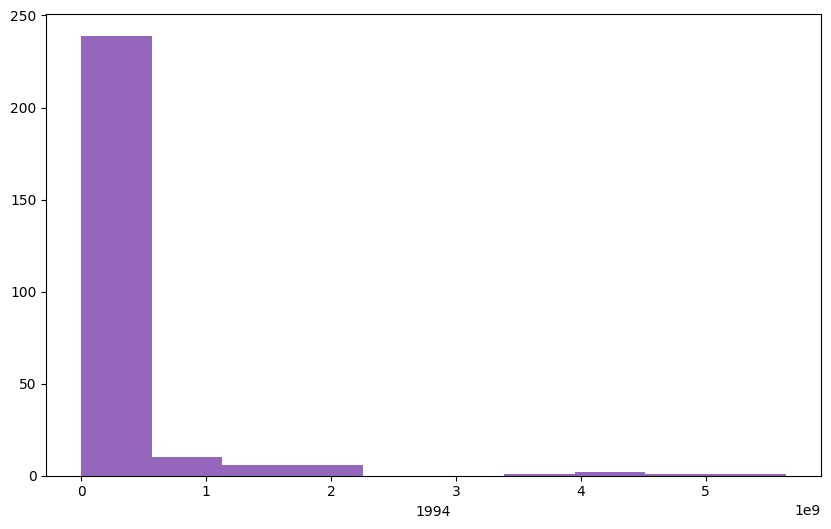

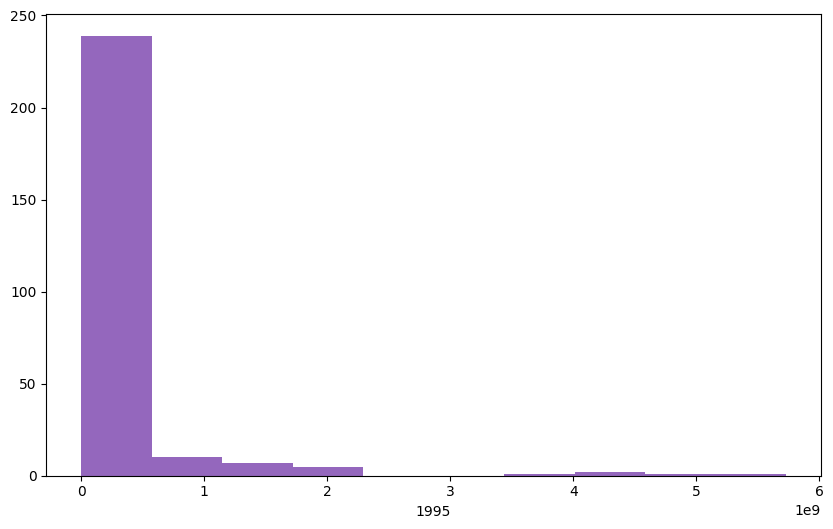

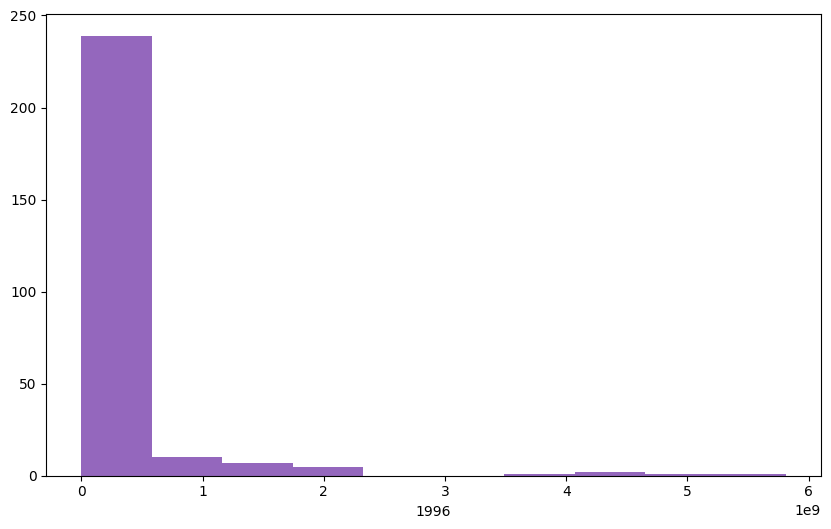

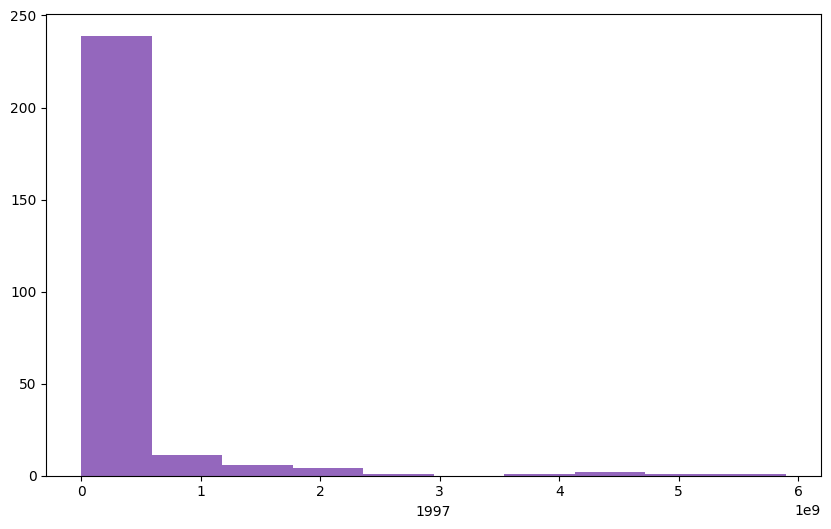

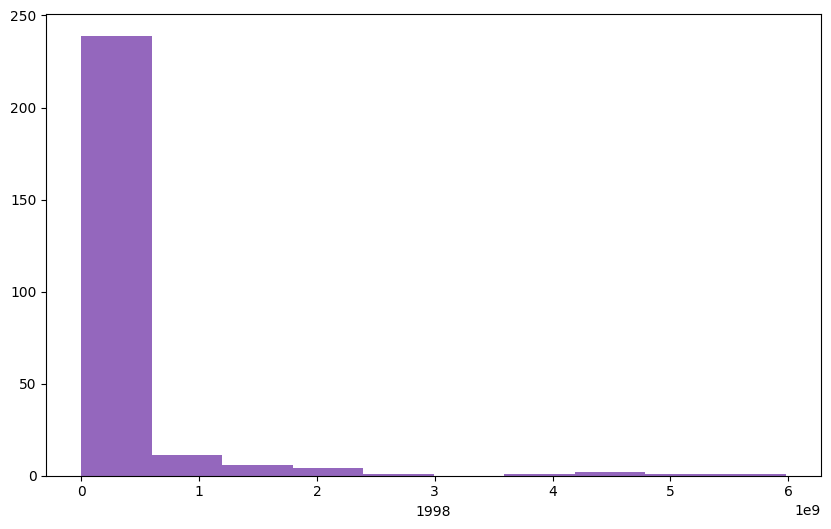

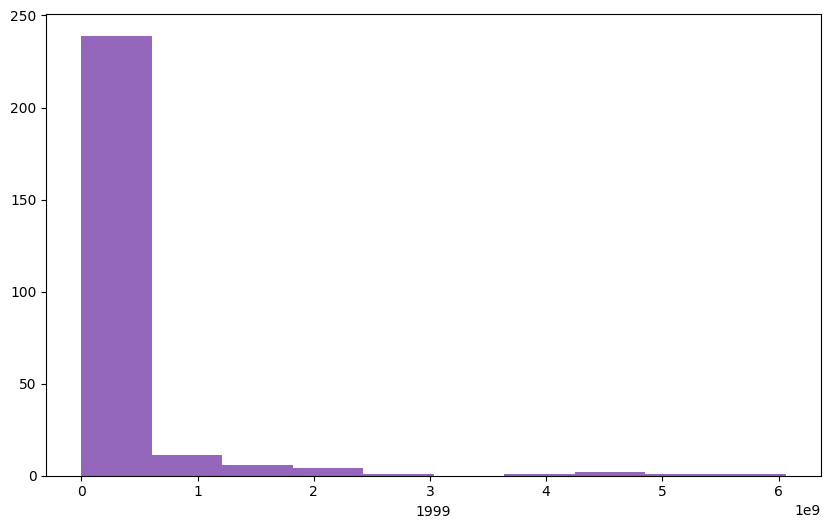

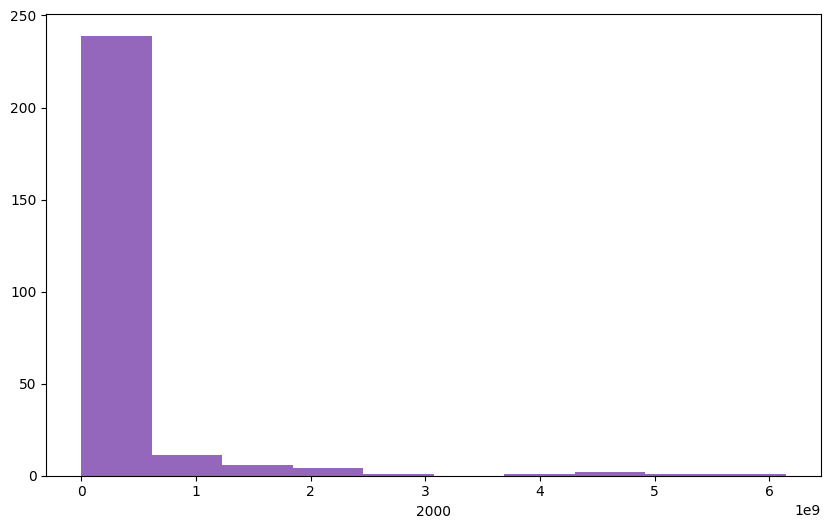

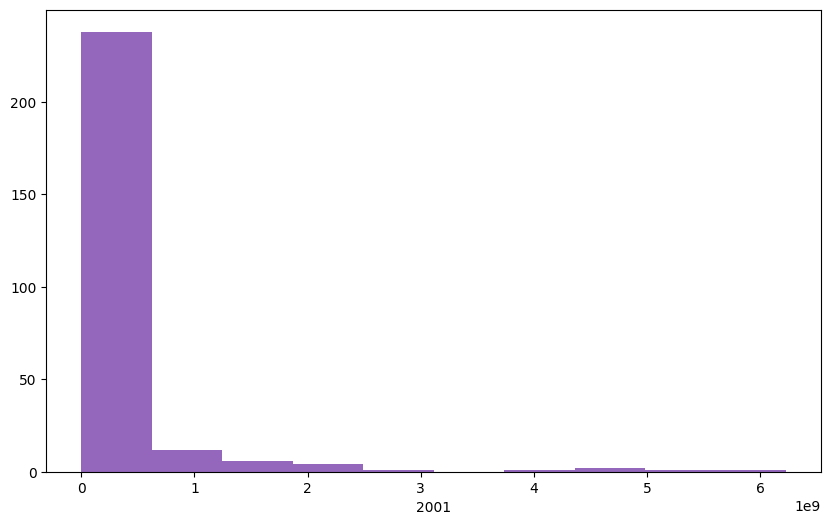

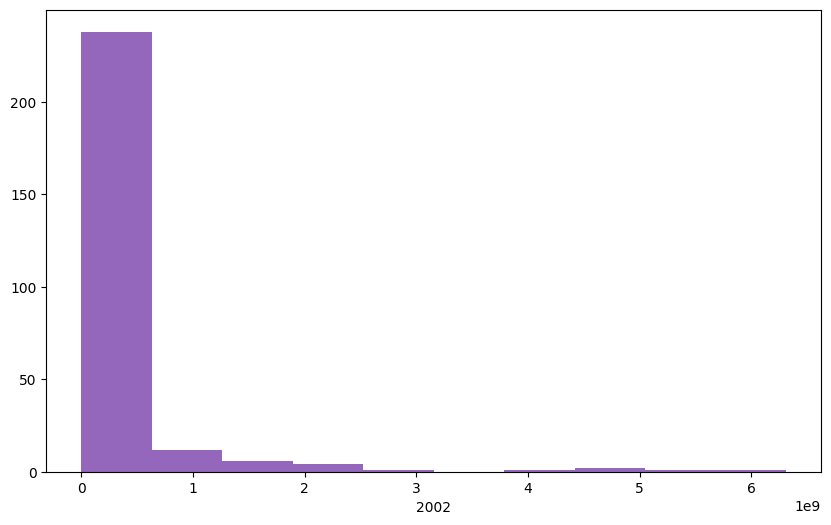

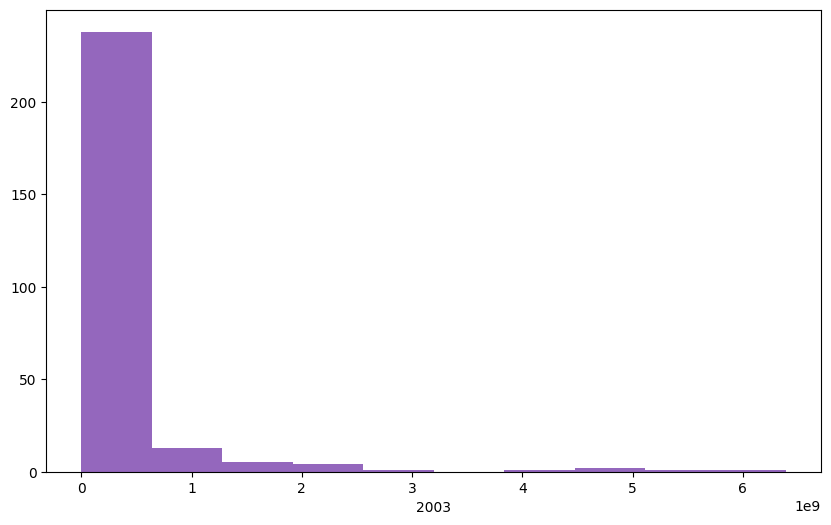

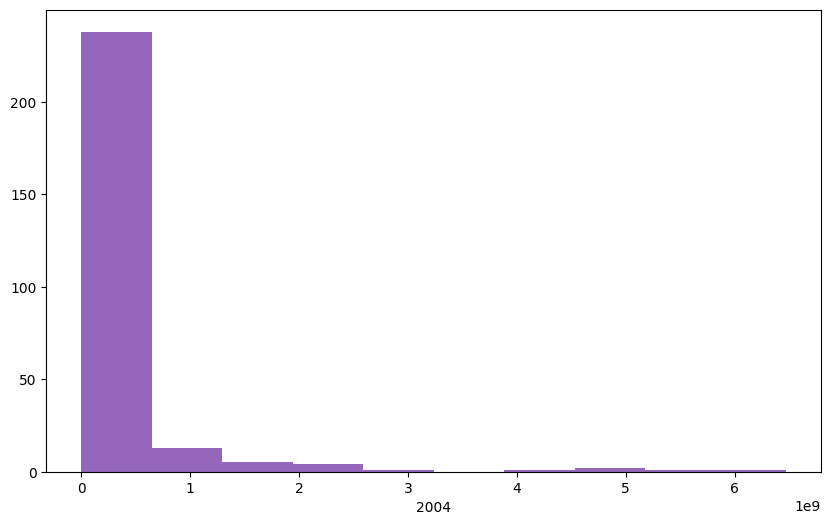

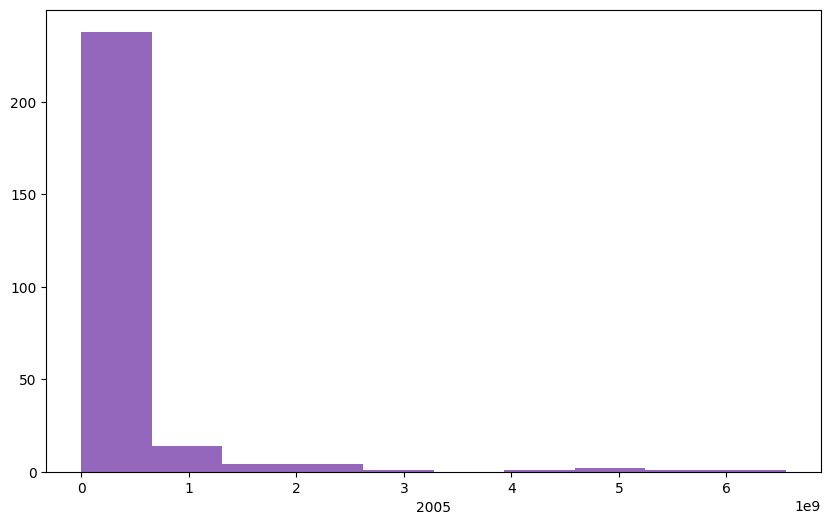

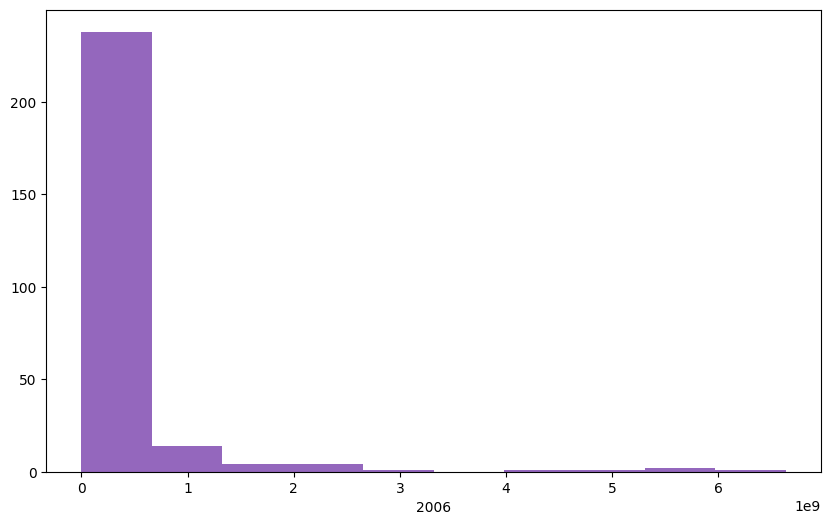

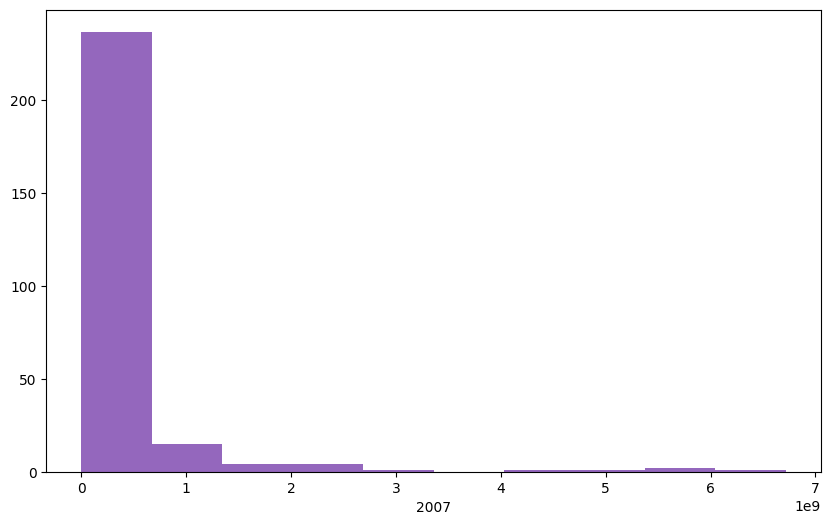

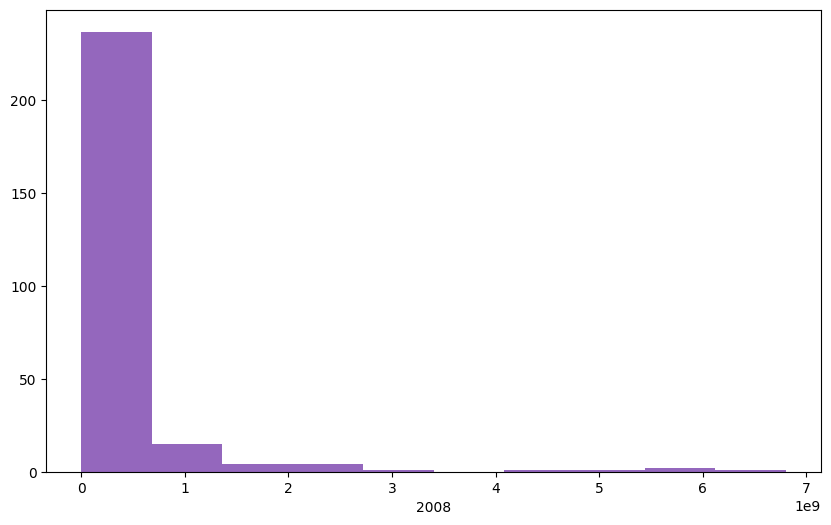

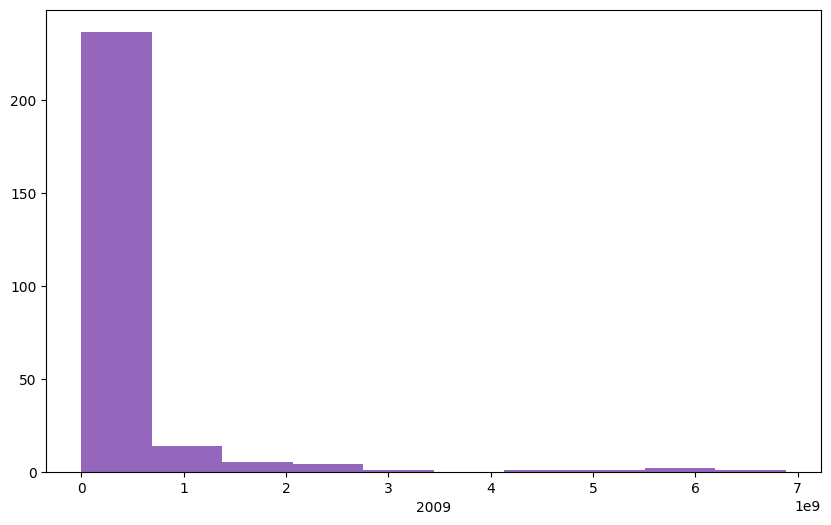

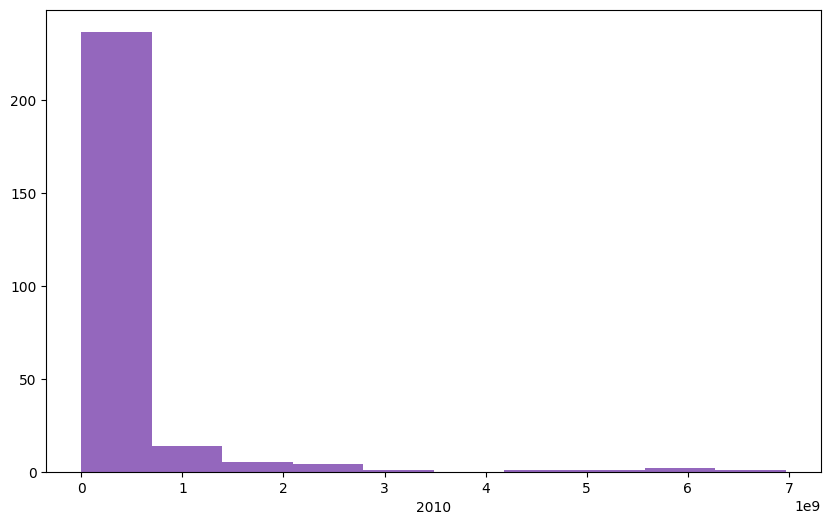

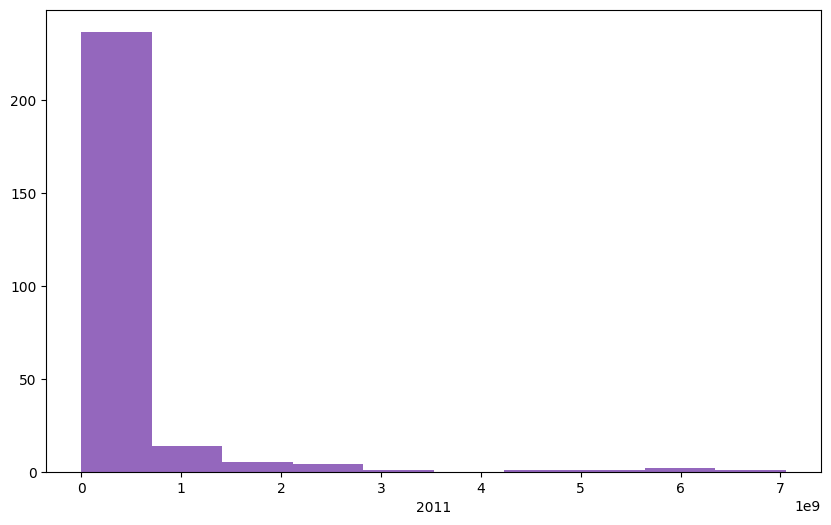

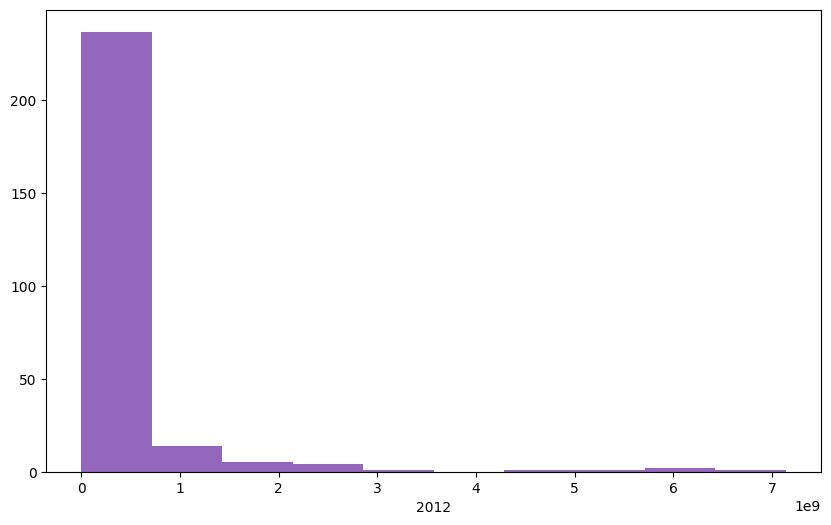

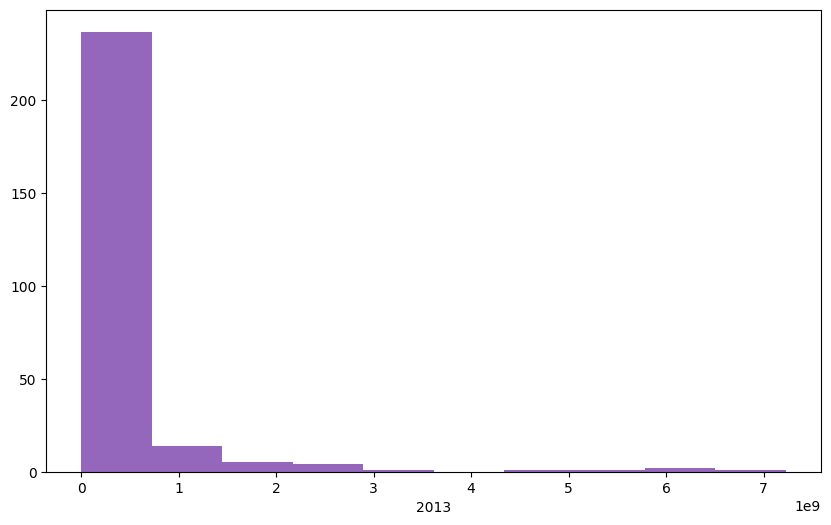

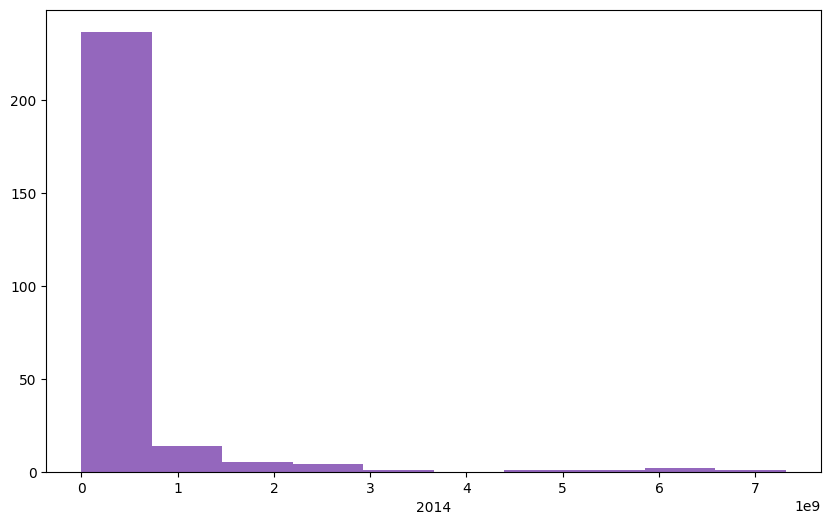

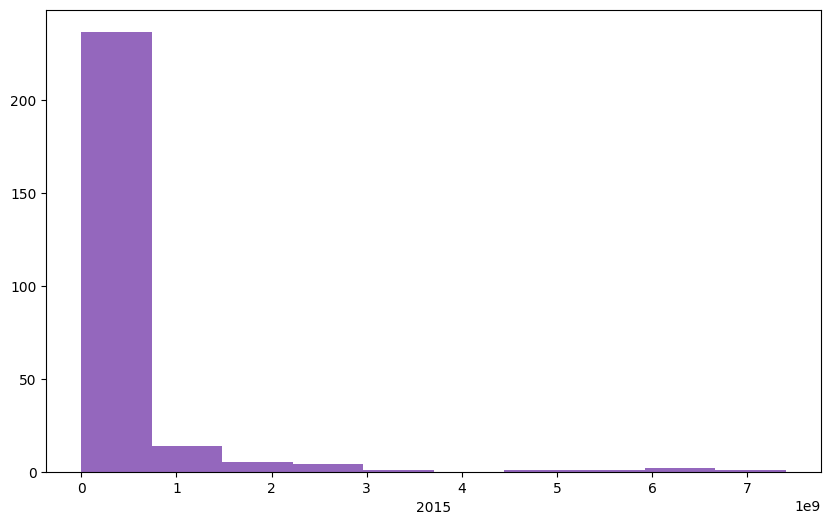

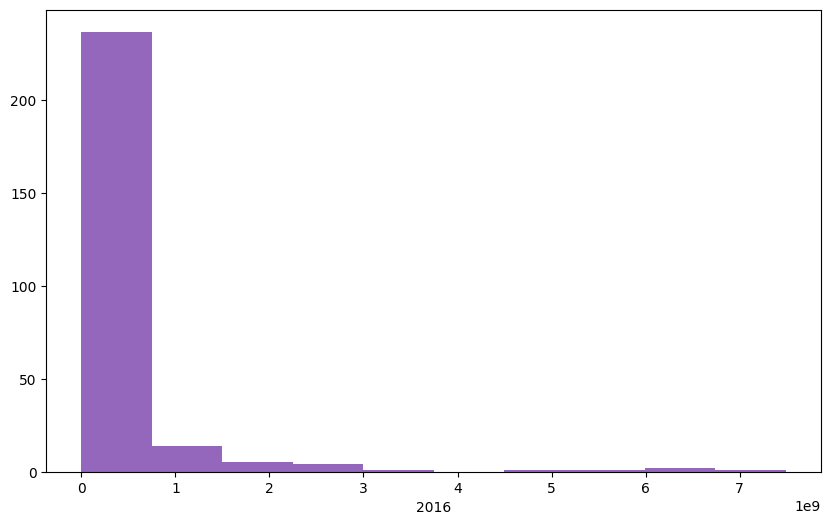

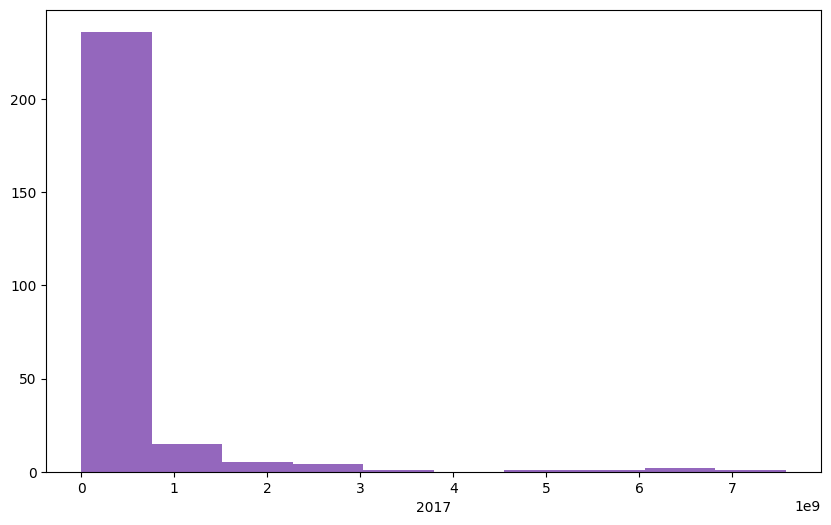

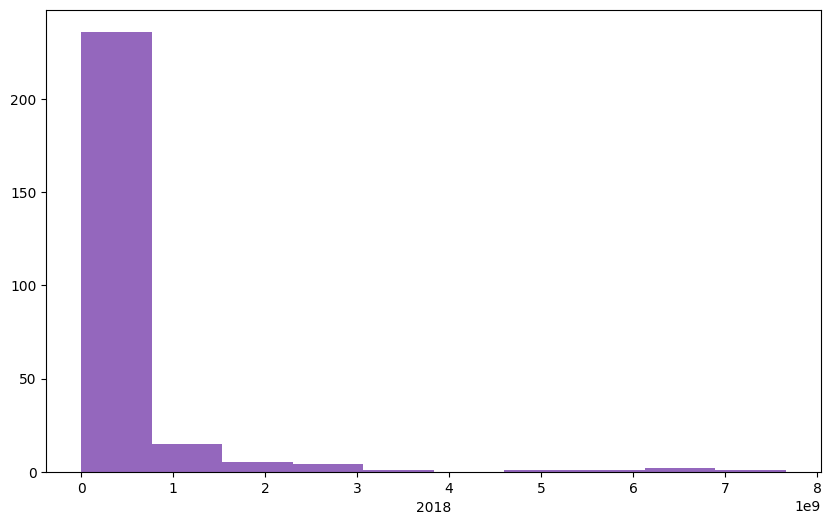

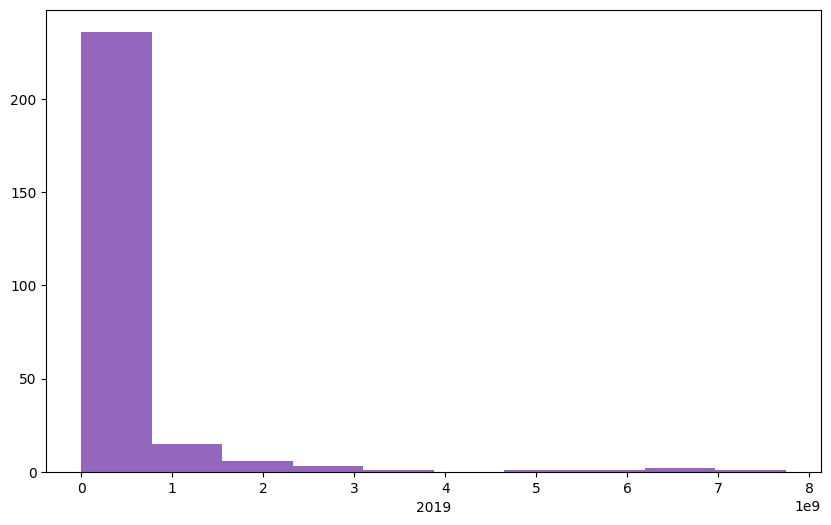

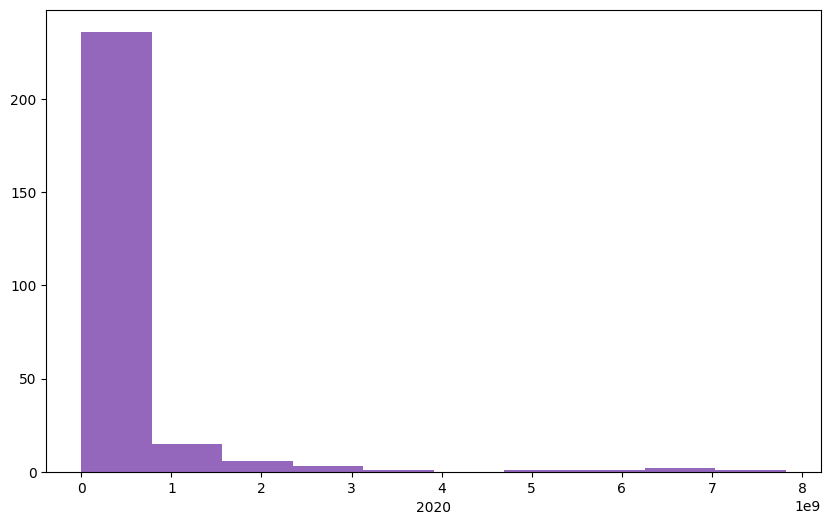

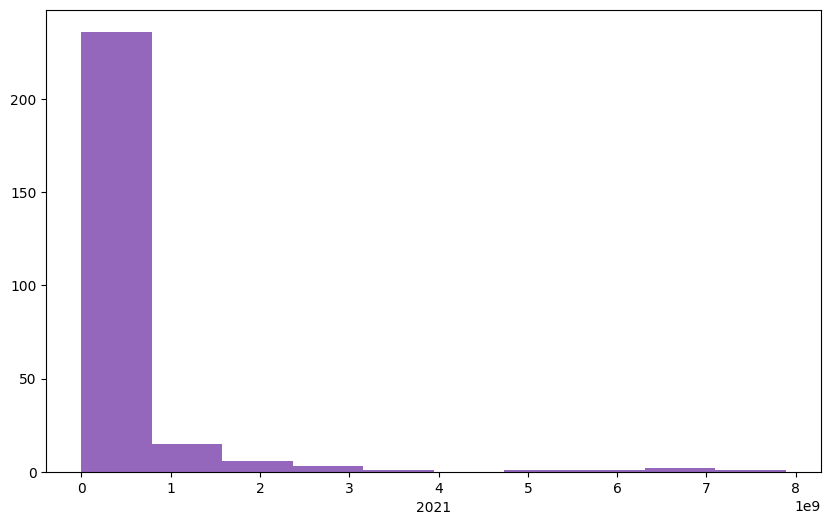

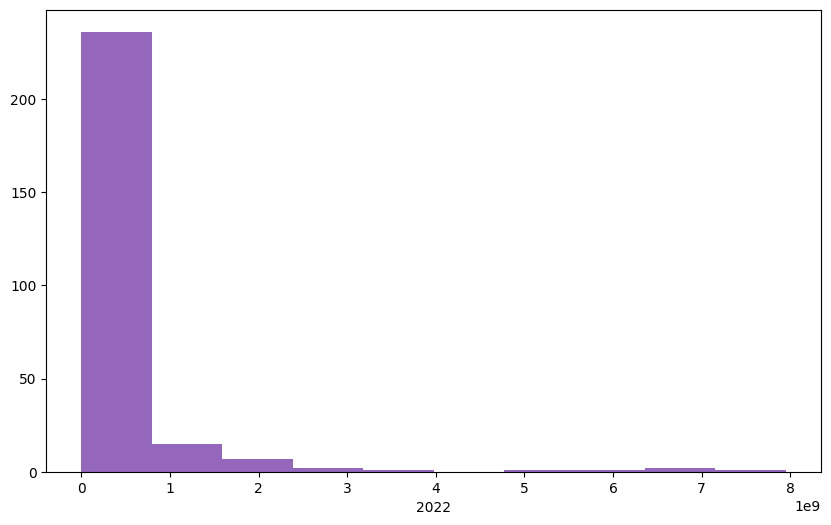

In [6]:
for i in cols:
        fig = plt.figure(figsize=(10, 6))
        plt.hist(df[i],color='#9467BD',bins=10)
        plt.xlabel(i)
        plt.show()

Total Sum of Values per Year

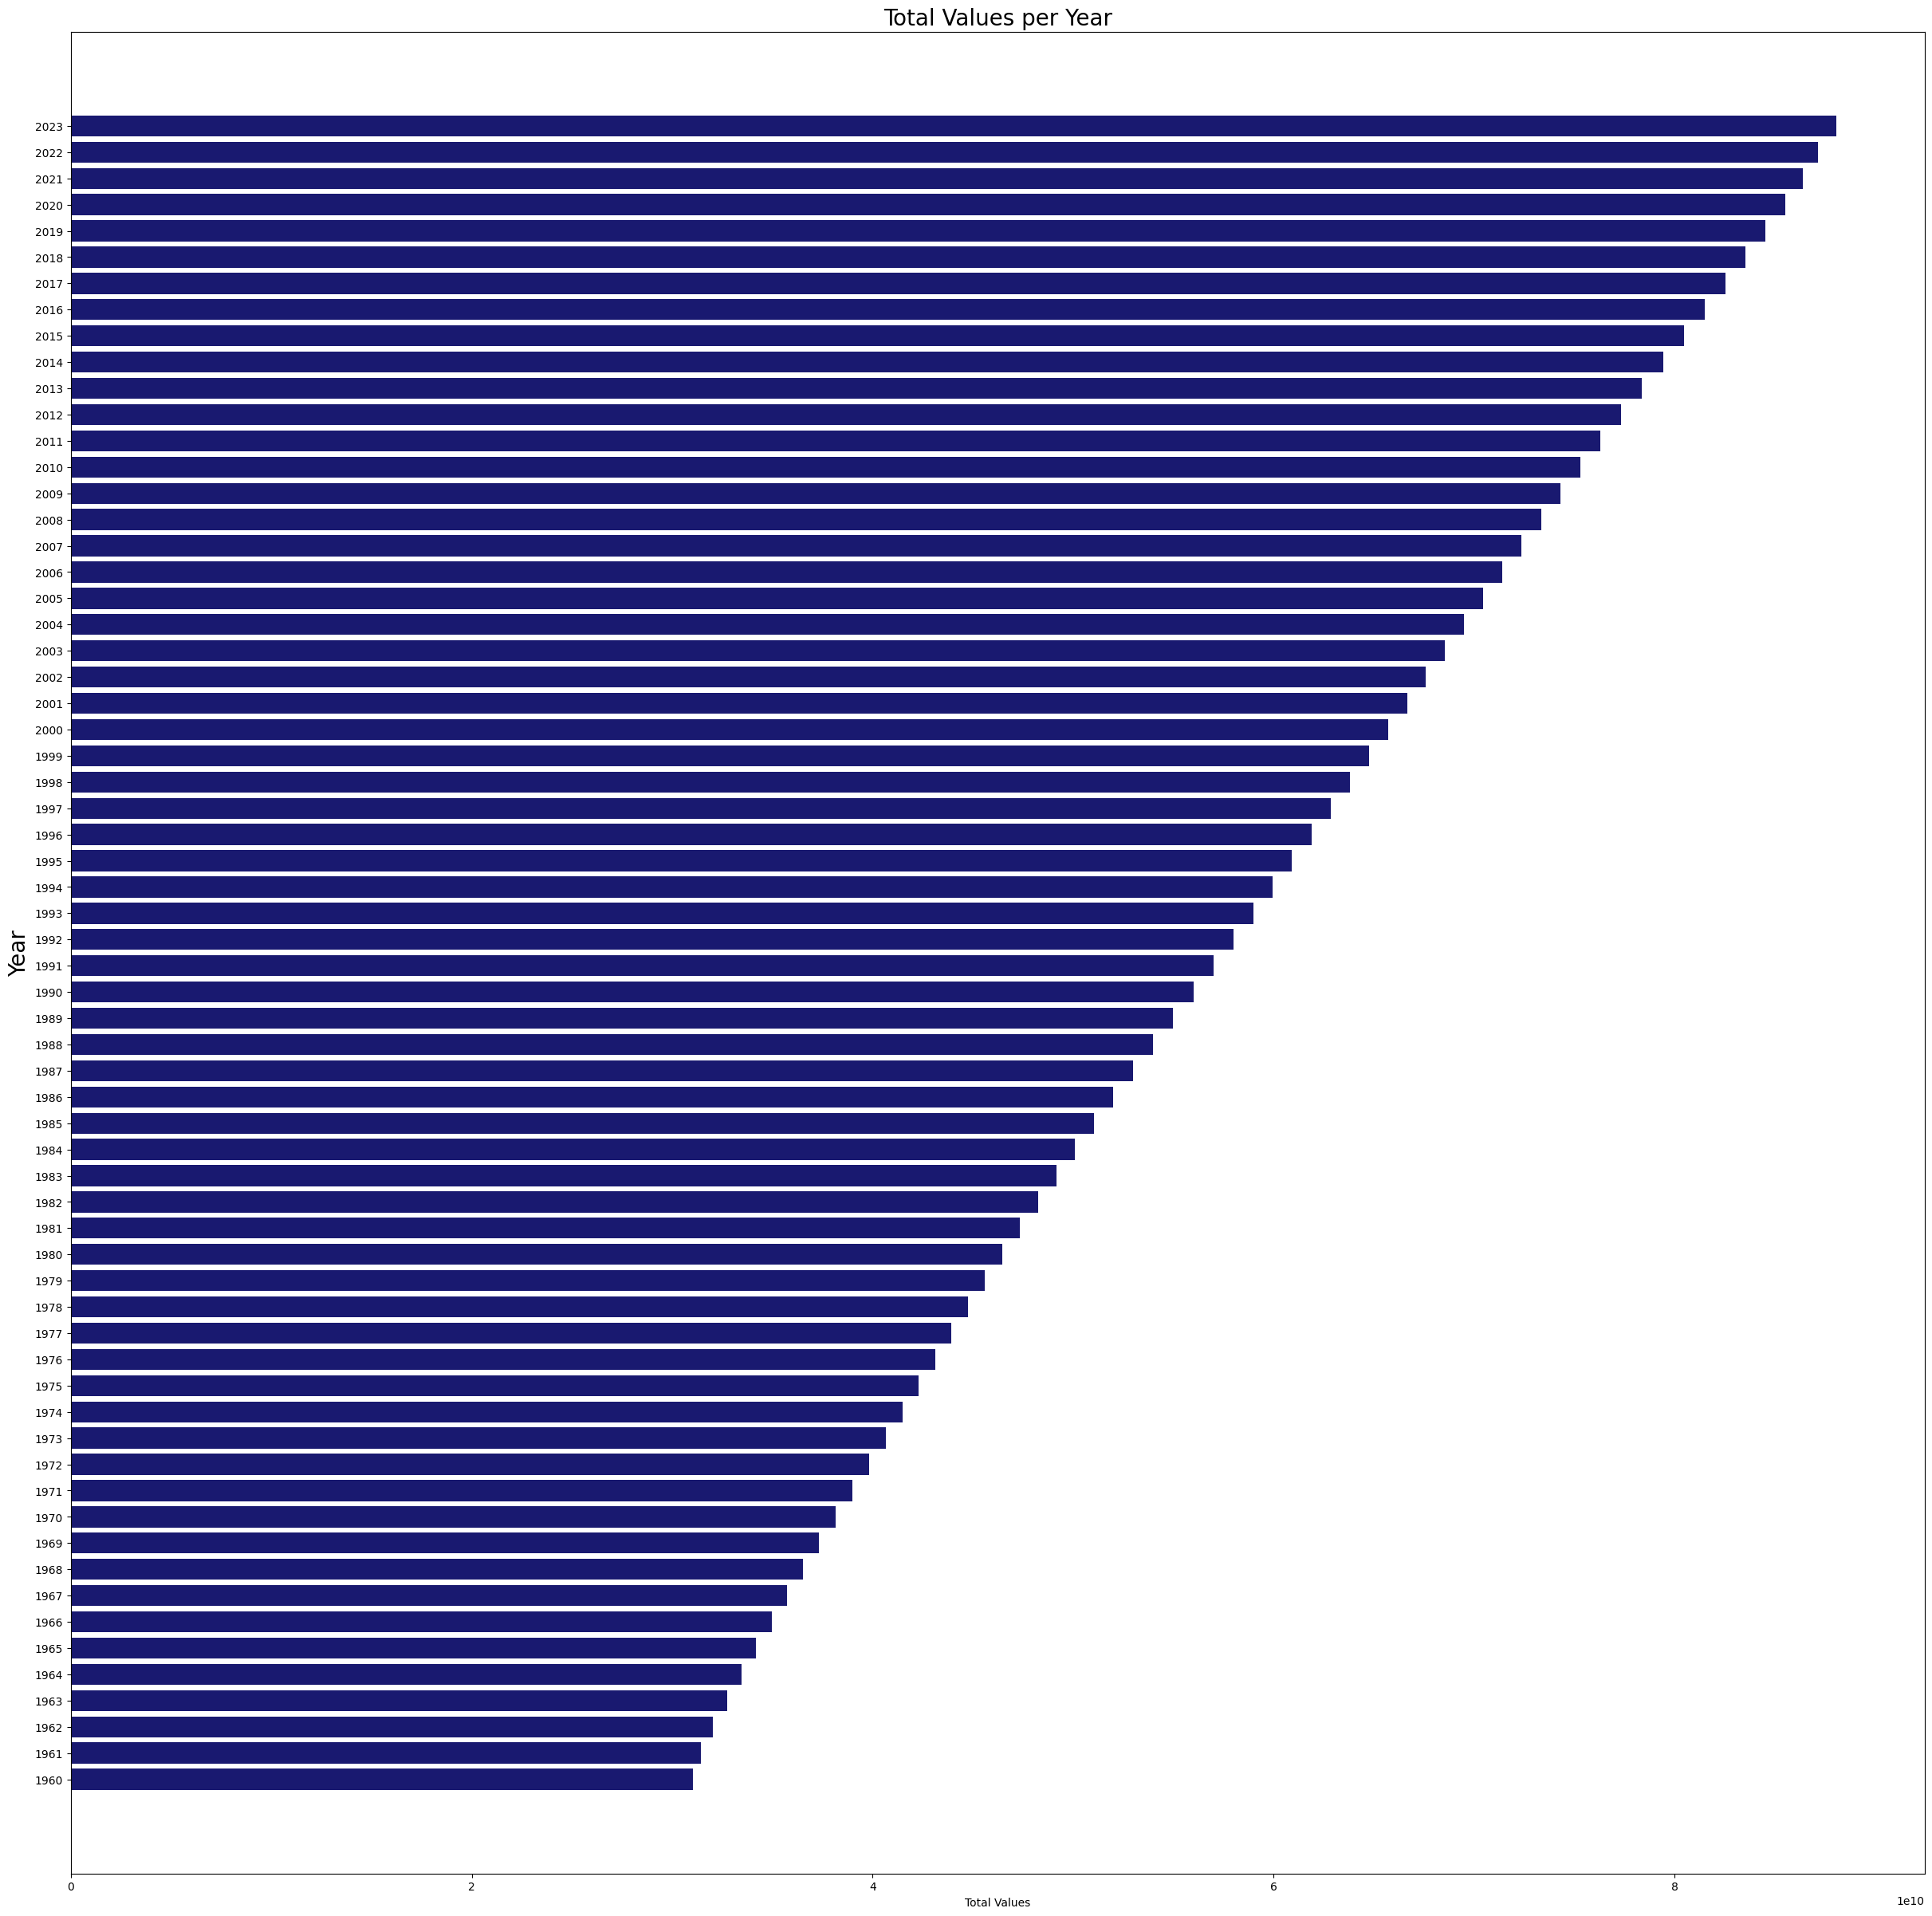

In [7]:
years = df.columns[4:]

total_values = df[years].sum()

plt.figure(figsize=(30, 30))
plt.barh(years, total_values,color='#191970')
plt.xlabel('Total Values')
plt.ylabel('Year', size=20)
plt.title('Total Values per Year', size=20)
plt.show()